<a href="https://www.kaggle.com/code/mohamedbakrey/classification-for-diabetes-disease-by-ml-and-xai?scriptVersionId=91312347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Liberary

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
import plotly.express as px
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")

# Loading Data set

In [26]:
df=pd.read_csv("../input/diabetes-disease-updated-dataset/diabetes.csv")

In [27]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.shape

(768, 9)

In [30]:
df.isna().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

###### Data is very clean
`no missing value
`

## Some of EDA

In [31]:
#between age and gender
px.box(df, x="Age", y="DiabetesPedigreeFunction")

In [32]:
px.violin(df, y="Age", x="DiabetesPedigreeFunction", color="Outcome")


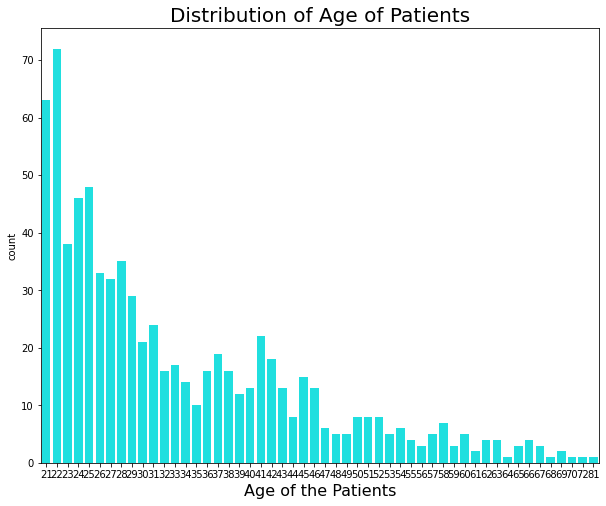

In [33]:
x = df['Age']
plt.figure(figsize=(10,8))
ax = sns.countplot(x,color='#00ffff')
ax.set_xlabel(xlabel = 'Age of the Patients', fontsize = 16)
ax.set_title(label = 'Distribution of Age of Patients', fontsize = 20)
plt.show()

In [34]:
## horizontal bar graphs
def plotly_hBar(q, title, height=400):   
    fig = px.histogram(df.iloc[1:], 
                       y=q,
                       orientation='h',
                       width=700,
                       height=height,
                       histnorm='percent',
                       
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#E6E6E6',
                      plot_bgcolor='#E6E6E6',                      
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_yaxes(categoryorder='total ascending')
    fig.update_traces(marker_color='salmon')
    fig.update_layout(yaxis_title=None,
    autosize=False,
    margin=dict(
        l=250,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=False)
    fig.show()   
    

## vertical bar graphs
def plotly_vBar(q, title):   
    fig = px.histogram(df.iloc[1:],
                       x=q,
                       orientation='v',
                       width=700,
                       height=450,
                       histnorm='percent'*100,
                       )

    fig.update_layout(title=title, 
                      font_family="San Serif",
                      bargap=0.2,
                      barmode='group',
                      titlefont={'size': 28},
                      paper_bgcolor='#CD5C5C',
                      plot_bgcolor='#E6E6E6',
                      legend=dict(
                      orientation="v", 
                          y=1, 
                          yanchor="top", 
                          x=1.250, 
                          xanchor="right",)                 
                      ).update_xaxes(categoryorder='total descending')
    fig.update_traces(marker_color='seagreen')
    fig.update_layout(xaxis_title=None,
    autosize=False,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
    ),
    )
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=True)
    fig.show() 

In [35]:
title= "What is your Age? "
plotly_hBar("Age", title=title)

In [36]:
title= "What is your Insulain? "
plotly_hBar("Insulin", title=title)

In [37]:
title= "What is your Pregnancies? "
plotly_hBar("Pregnancies", title=title)

In [38]:
title= "What is your DiabetesPedigreeFunction? "
plotly_hBar("DiabetesPedigreeFunction", title=title)

In [39]:
op = df['Outcome'].value_counts()
fig = go.Figure(data=[go.Pie(labels=op.index,values=op.values)])
fig.update_layout(title='Label distribution')
fig.show()

## Using ML Algo

## Train- test- Split

In [50]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
X_train, X_test, y_train, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [76]:
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[85 14]
 [24 31]]


### Using Decision Tree Classifier


In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
# Creating model object
model_dt = DecisionTreeClassifier( )
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [90]:
print('model_DT Train Score is : ' , model_dt.score(X_train, y_train))


model_DT Train Score is :  1.0


In [94]:
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, pred_dt))

Confusion Matrix
[[78 21]
 [16 39]]
